In [39]:
## import openml
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from plot_func import *

## Section 1: Reading the data

In [40]:
df = pd.read_csv('Census-Income-KDD.csv')
print(df.shape)

(199523, 42)


In [41]:
df.columns

Index(['age', 'class_worker', 'det_ind_code', 'det_occ_code', 'education',
       'wage_per_hour', 'hs_college', 'marital_stat', 'major_ind_code',
       'major_occ_code', 'race', 'hisp_origin', 'sex', 'union_member',
       'unemp_reason', 'full_or_part_emp', 'capital_gains', 'capital_losses',
       'stock_dividends', 'tax_filer_stat', 'region_prev_res',
       'state_prev_res', 'det_hh_fam_stat', 'det_hh_summ', 'unknown',
       'mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_same',
       'mig_prev_sunbelt', 'num_emp', 'fam_under_18', 'country_father',
       'country_mother', 'country_self', 'citizenship', 'own_or_self',
       'vet_question', 'vet_benefits', 'weeks_worked', 'year', 'income_50k'],
      dtype='object')

In [42]:
df = df.drop('unknown', axis=1)

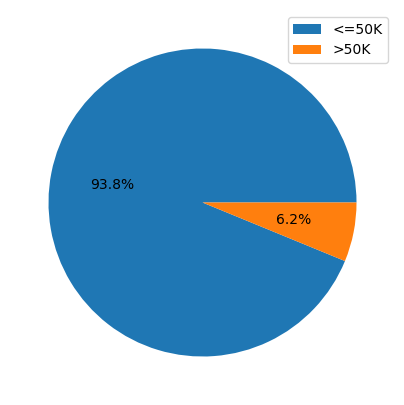

In [43]:
pieplot(df)

## Section 2: Basic inspection of the data

In [44]:
df.describe()

,age,det_ind_code,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
count,199523.000000,199523.000000,199523.000000,199523.000000,199523.00000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000,199523.000000
mean,34.494199,15.352320,11.306556,55.426908,434.71899,37.313788,197.529533,1.956180,0.175438,1.514833,23.174897,94.499672
std,22.310895,18.067129,14.454204,274.896454,4697.53128,271.896428,1984.163658,2.365126,0.553694,0.851473,24.411488,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.00000,0.000000,0.000000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.00000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


In [45]:
# count column types
df.dtypes.value_counts()

object    29
int64     12
Name: count, dtype: int64

<AxesSubplot:>

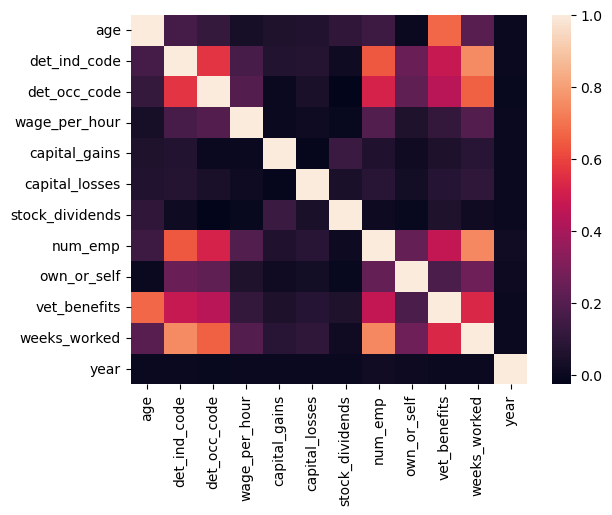

In [46]:
# heatmap of the correlation between the numerical features
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

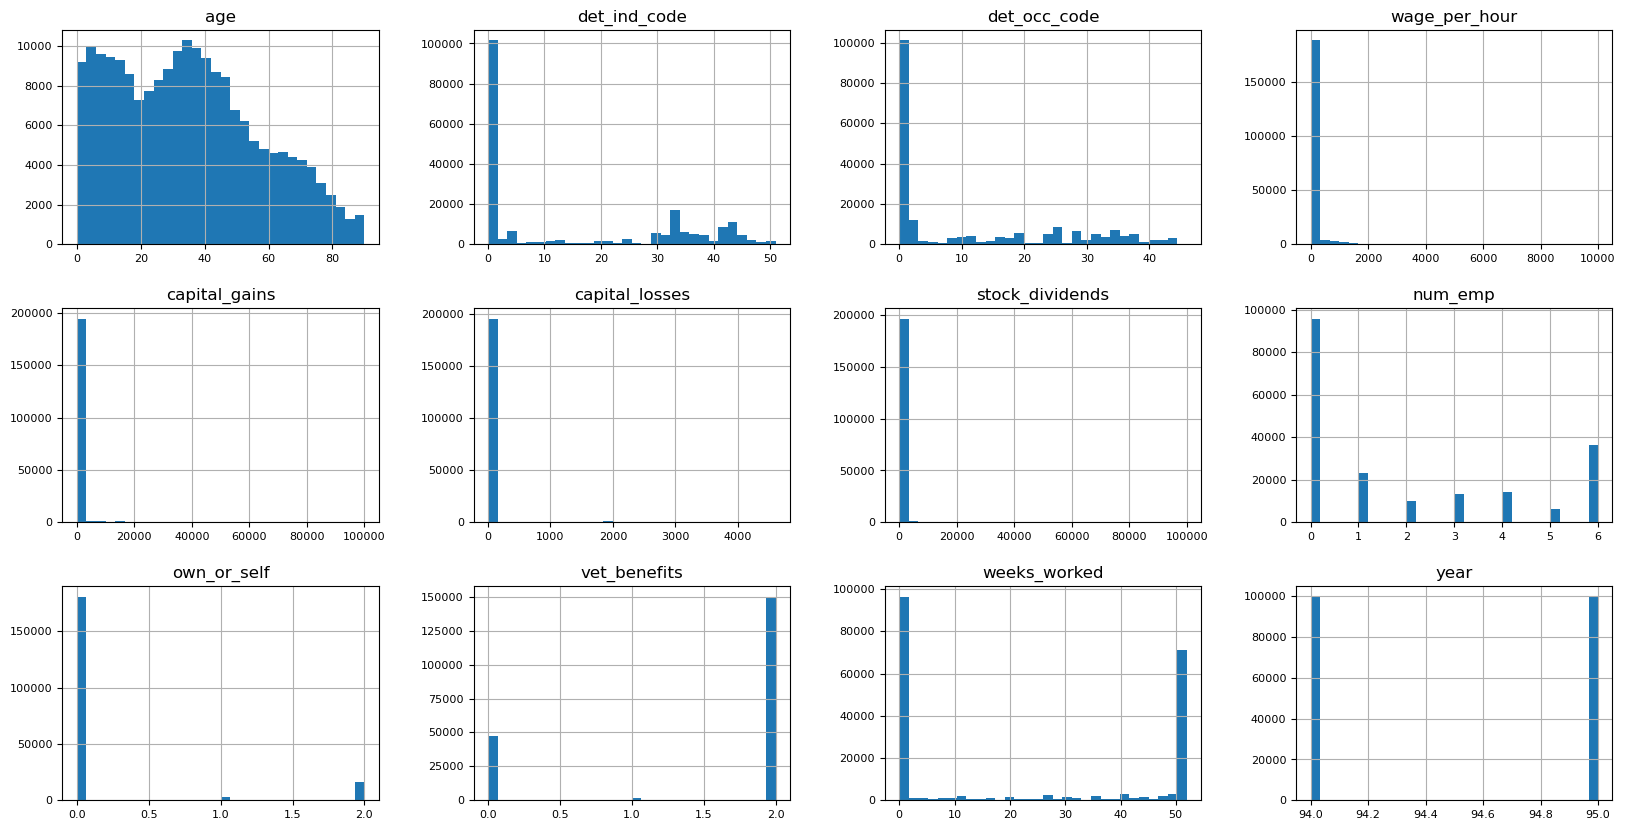

In [47]:
# draw the histograms in a 3 x 4 grid
df.hist(figsize=(20,10), bins=30, xlabelsize=8, ylabelsize=8, layout=(3,4))
plt.savefig('figures/all_num_histograms.pdf')
plt.show()

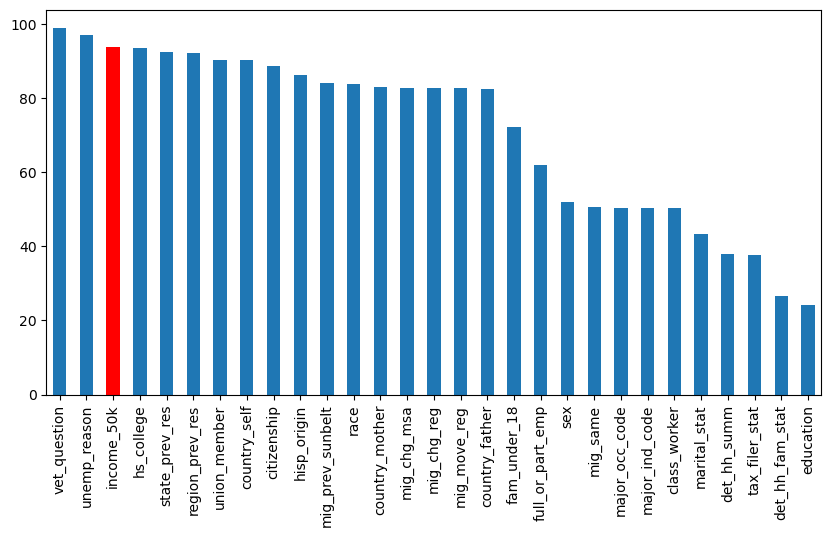

In [48]:
# plot the percentage of the most common category for each categorical feature in a single plot for category vs percentage
a = df.select_dtypes(include=['object']).apply(lambda x: x.value_counts(normalize=True).max()*100)
# sort the values
a = a.sort_values(ascending=False)
# plot the names in diagonal
a.plot(kind='bar', figsize=(10,5))
# plot income_50k bar in red 
plt.bar(a.index.get_loc('income_50k'), a['income_50k'], color='red', width=0.5)
plt.title('')
plt.savefig('figures/raw_cat_most_common.pdf', bbox_inches='tight')
plt.show()

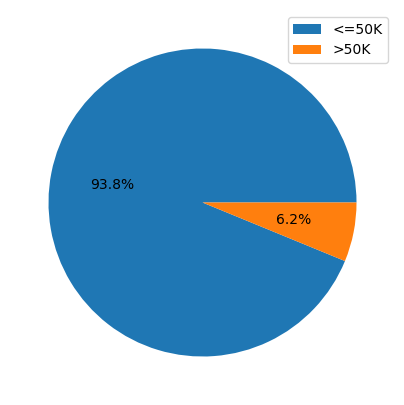

In [49]:
# pieplot of income_50k, change the names of - 50000. and 50000+. to <=50K and >50K
df['income_50k'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), labels=['', ''])
plt.legend(labels=['<=50K', '>50K'])
plt.ylabel('')
plt.savefig('figures/target_freq.pdf')
plt.show()

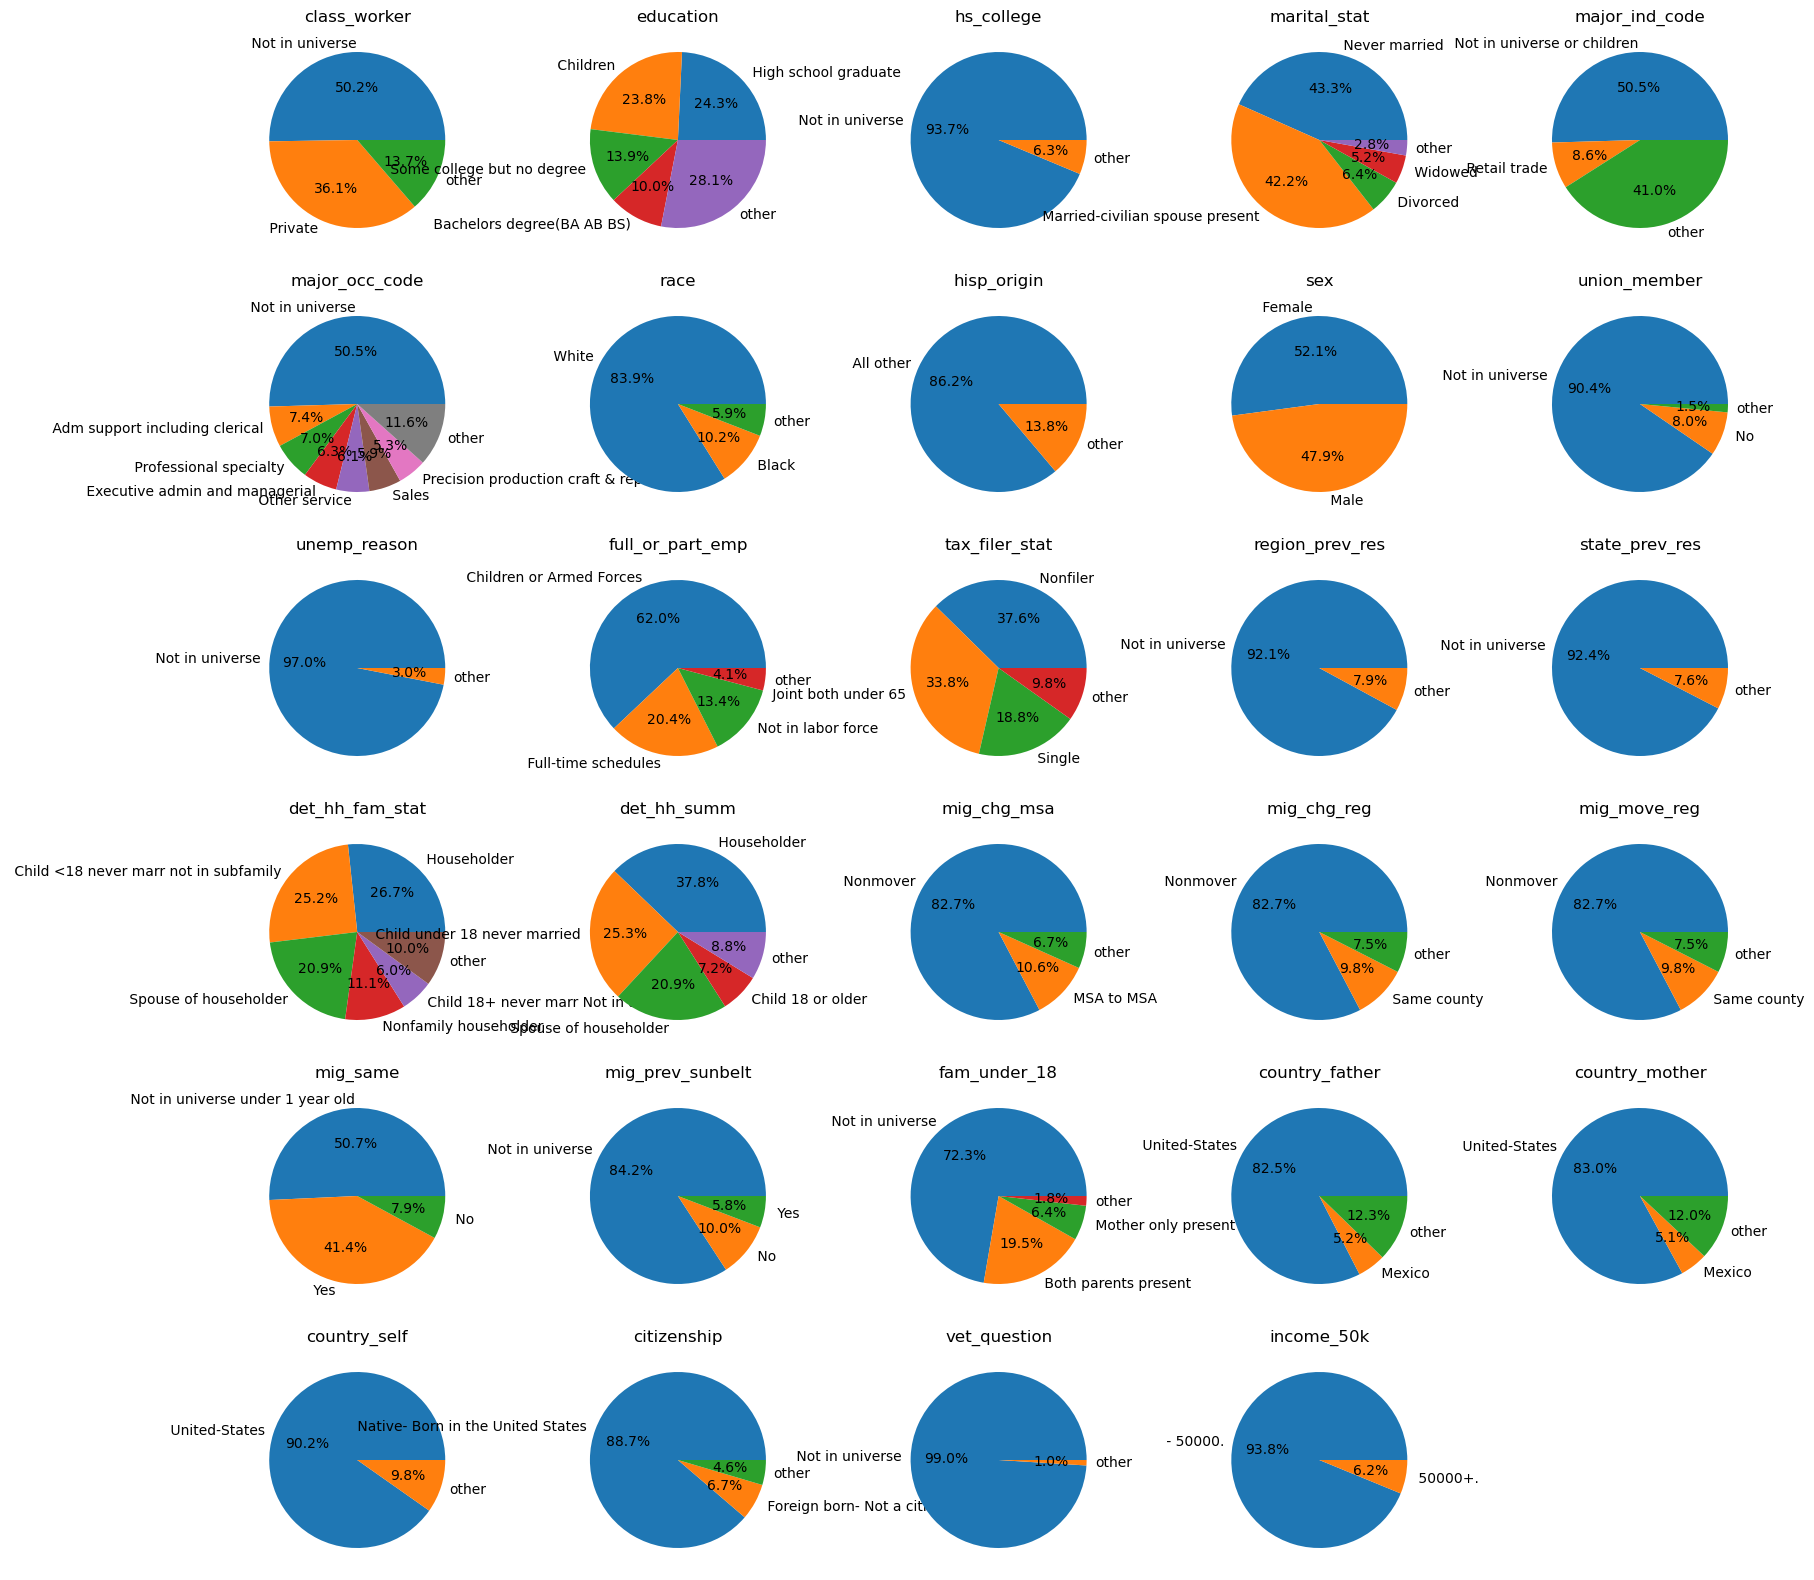

In [50]:
cat_col = df.select_dtypes(include=['object']).columns
pieplots(df, cat_col, figsize=(20, 20))

## Section 3: Data cleaning

In [51]:
df1 = df.copy()

# we remove year since there are 2 years and is not relevant
# df1 = df1.drop('year', axis=1)

To avoid having correlation between the rows, we drop the duplicates.

In [52]:
# show the number of duplicates
print(f"Number of duplicates: {df1.duplicated().sum()}")
df1 = df1.drop_duplicates()
print(f"Number of rows after removing duplicates: {df1.shape[0]}")

Number of duplicates: 46627
Number of rows after removing duplicates: 152896


### Missing values detection

In [53]:
df1.describe()

,age,det_ind_code,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,num_emp,own_or_self,vet_benefits,weeks_worked,year
count,152896.000000,152896.000000,152896.000000,152896.000000,152896.000000,152896.000000,152896.000000,152896.000000,152896.000000,152896.000000,152896.000000,152896.000000
mean,39.719371,19.942922,14.672876,72.324279,567.237115,48.664471,257.019255,2.538052,0.228587,1.821061,30.061591,94.490163
std,19.662074,18.234760,14.887964,312.072448,5359.204656,309.511387,2261.405280,2.403920,0.622317,0.559472,23.786471,0.499905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,38.000000,24.000000,10.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,45.000000,94.000000
75%,52.000000,37.000000,29.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,6.000000,2.000000,2.000000,52.000000,95.000000


<AxesSubplot:>

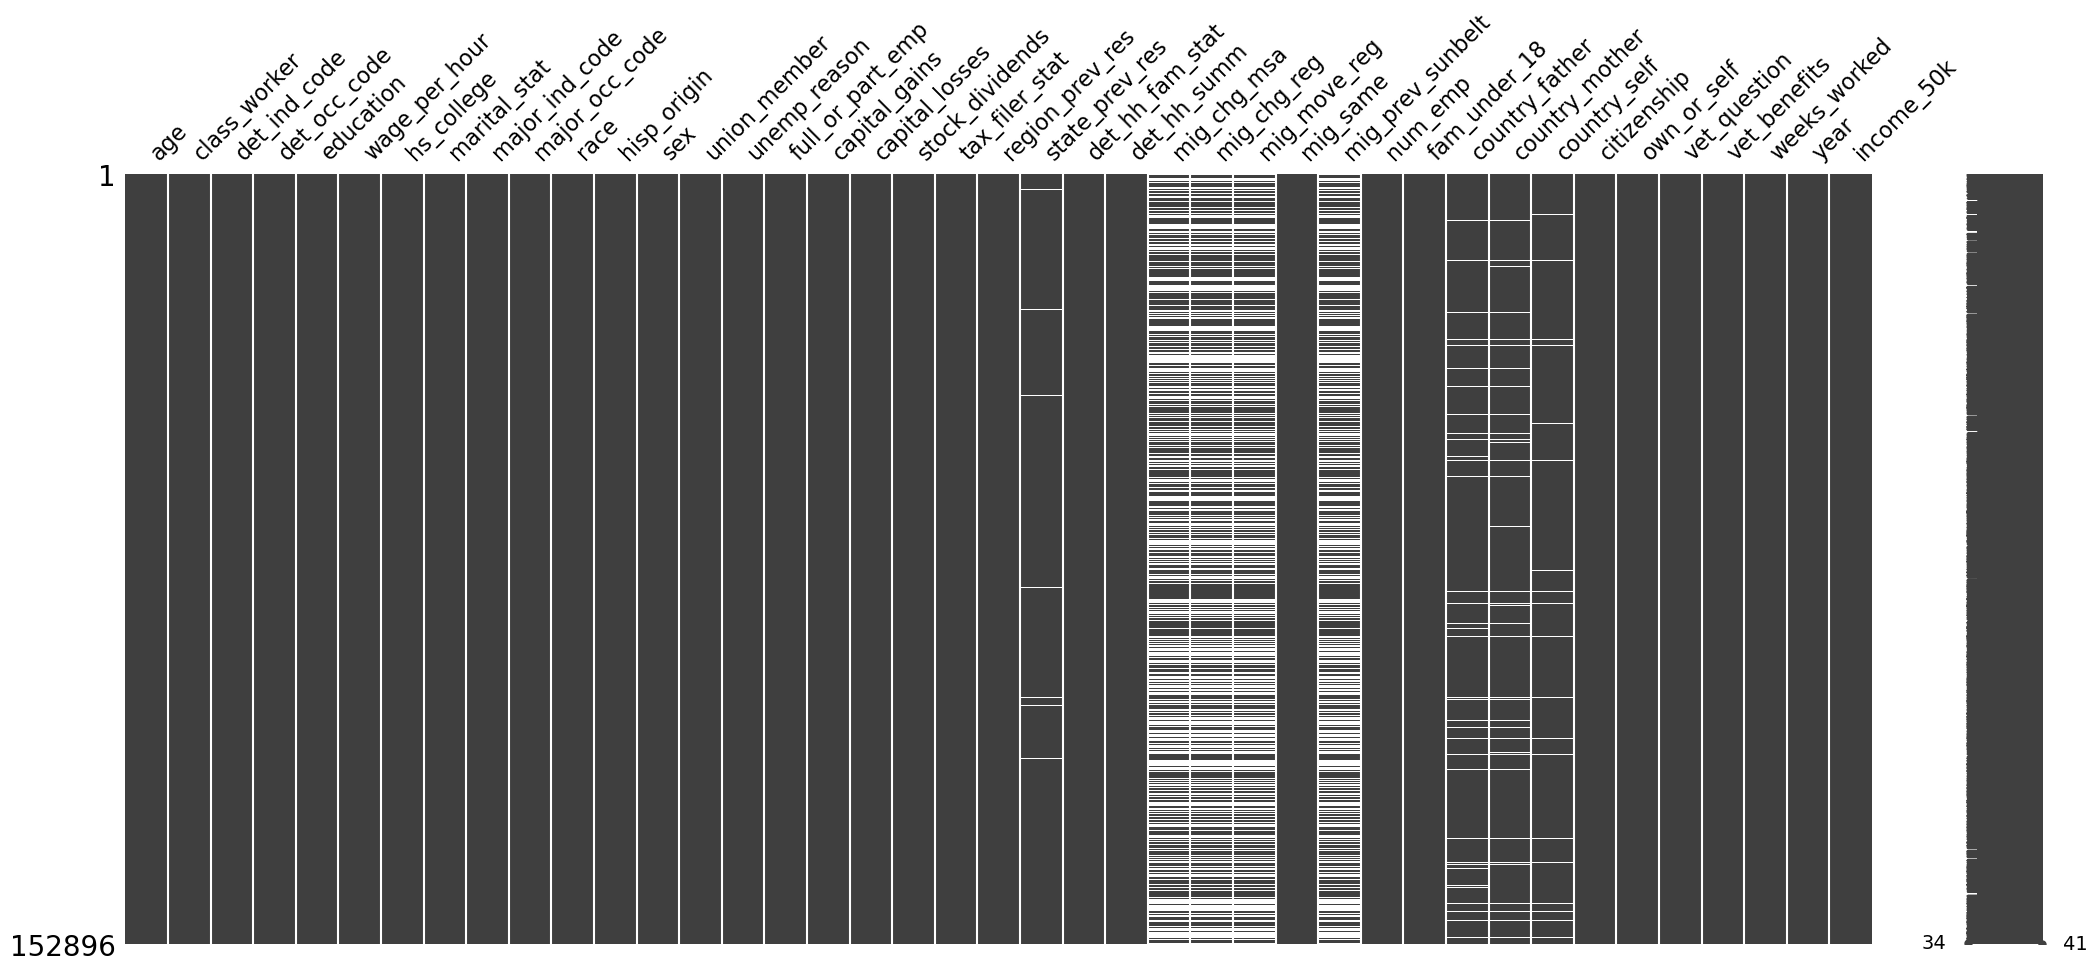

In [54]:
# plot the missing values
import missingno as msno
msno.matrix(df1)

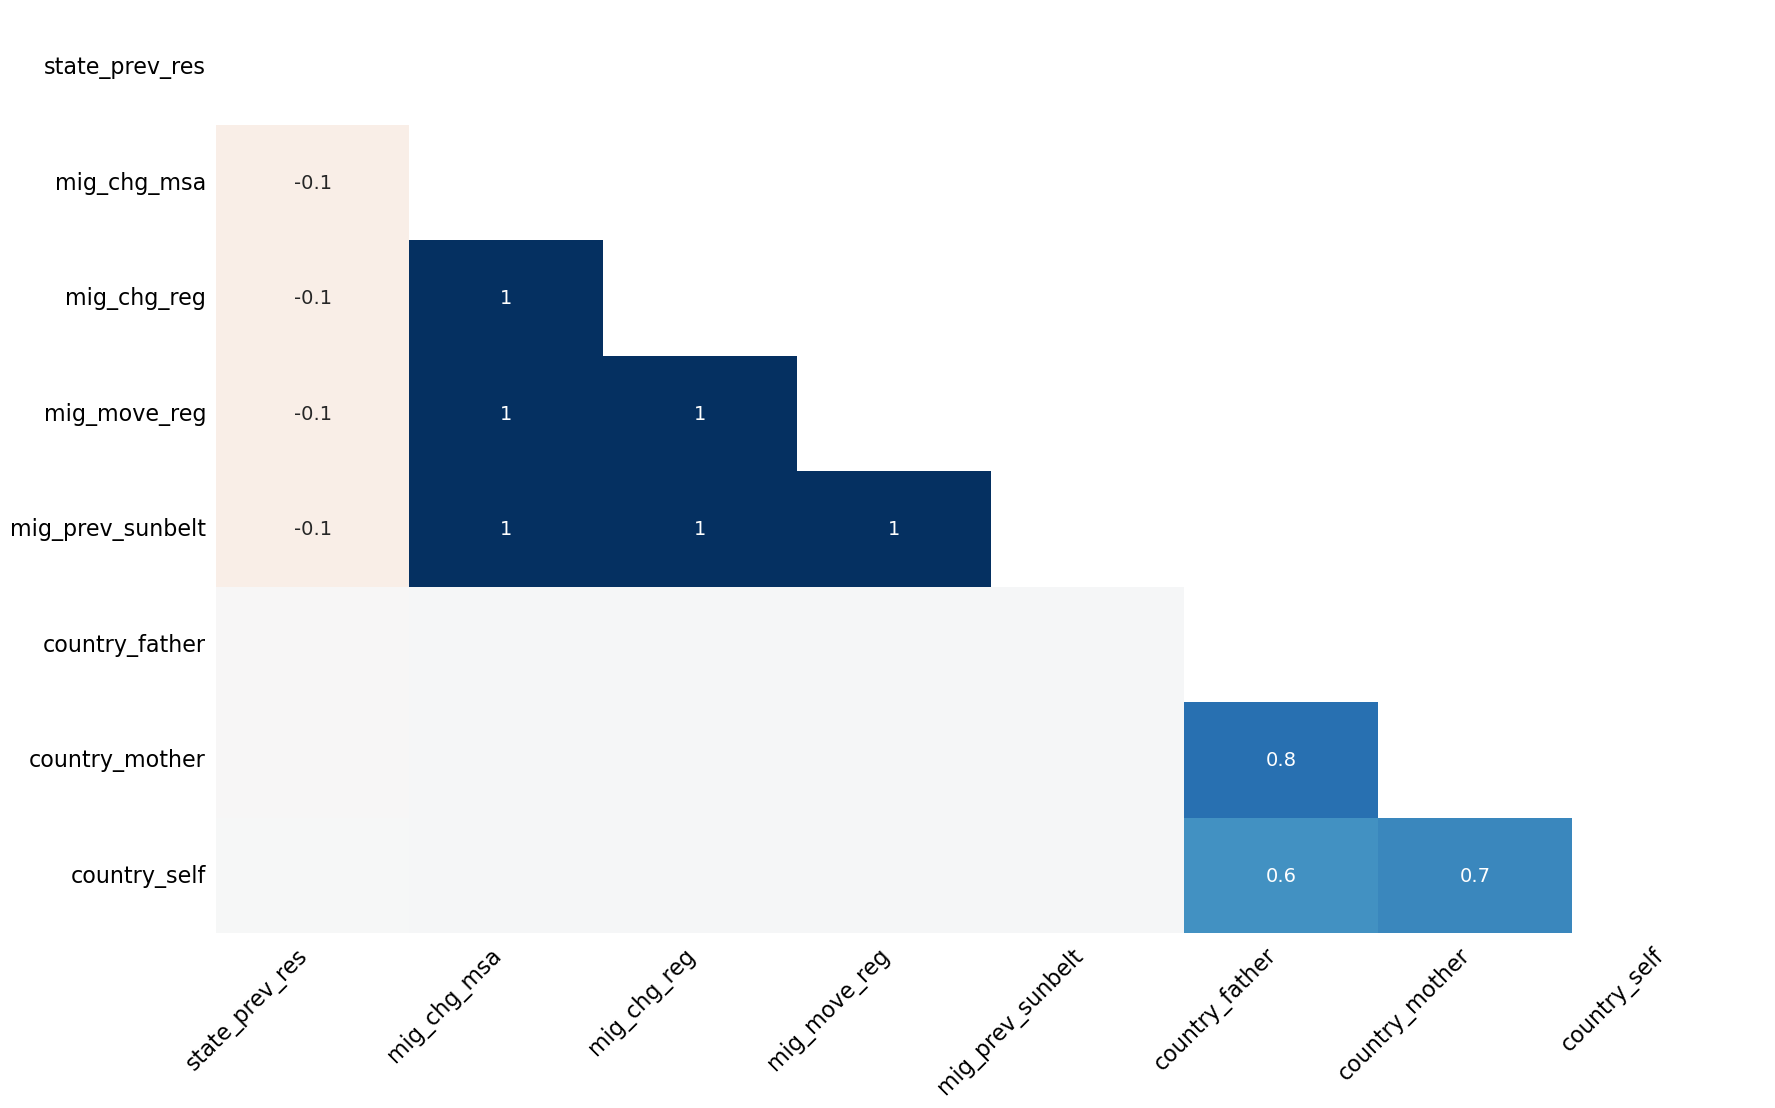

In [55]:
# plot the correlation between the missing values without the colorbar
msno.heatmap(df1, cbar=False)
# save the figure
plt.savefig('figures/missing_corr_heatmap.pdf', bbox_inches='tight')
plt.show()

We can see that the categories "mig_chg_msa", "mig_chg_reg", and "mig_move_reg" have a correlation of 1 with the target variable.

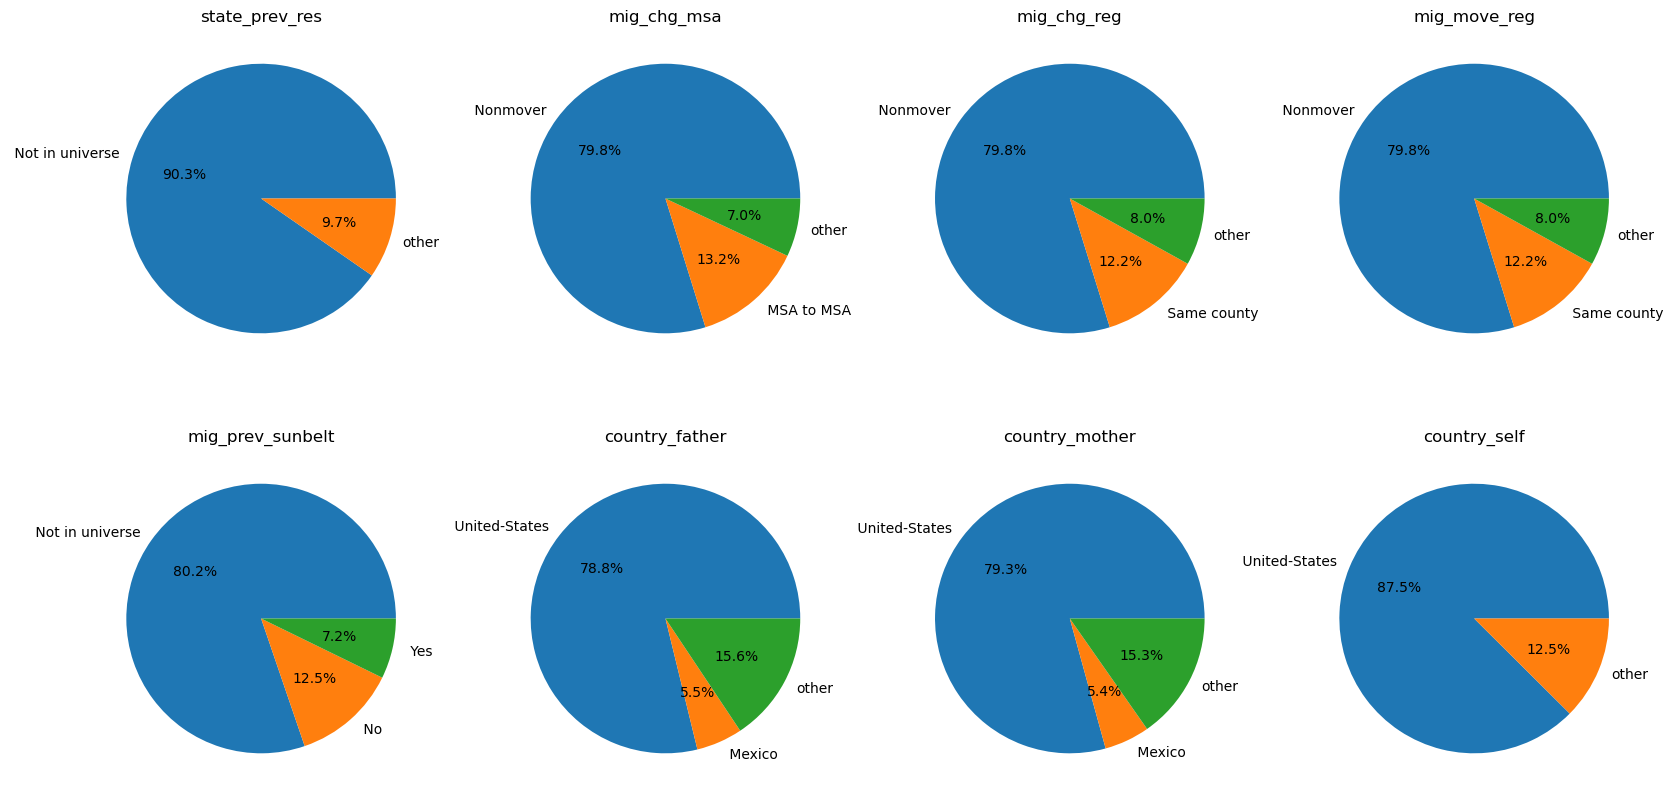

In [56]:
cols_with_missing = df1.columns[df1.isnull().any()]
pieplots(df1, cols_with_missing,grid=(2,4), figsize=(20, 10))

### Treating missing values

In [57]:
print("Percentage of missing values per column:")
print(df1.isnull().sum()[df1.isnull().sum() > 0] / df1.shape[0])

Percentage of missing values per column:
state_prev_res      0.004565
mig_chg_msa         0.490163
mig_chg_reg         0.490163
mig_move_reg        0.490163
mig_prev_sunbelt    0.490163
country_father      0.041747
country_mother      0.038000
country_self        0.021727
dtype: float64


In [58]:
# we drop the columns with more than 40% of missing values
print(f"dropping columns: {cols_with_missing[df1[cols_with_missing].isnull().mean() > 0.4]}")
df1 = df1.drop(cols_with_missing[df1[cols_with_missing].isnull().mean() > 0.4], axis=1)
print(df1.isnull().sum()[df1.isnull().sum() > 0] / df1.shape[0])
cols_with_missing = df1.columns[df1.isnull().any()]

dropping columns: Index(['mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_prev_sunbelt'], dtype='object')
state_prev_res    0.004565
country_father    0.041747
country_mother    0.038000
country_self      0.021727
dtype: float64


<AxesSubplot:xlabel='state_prev_res'>

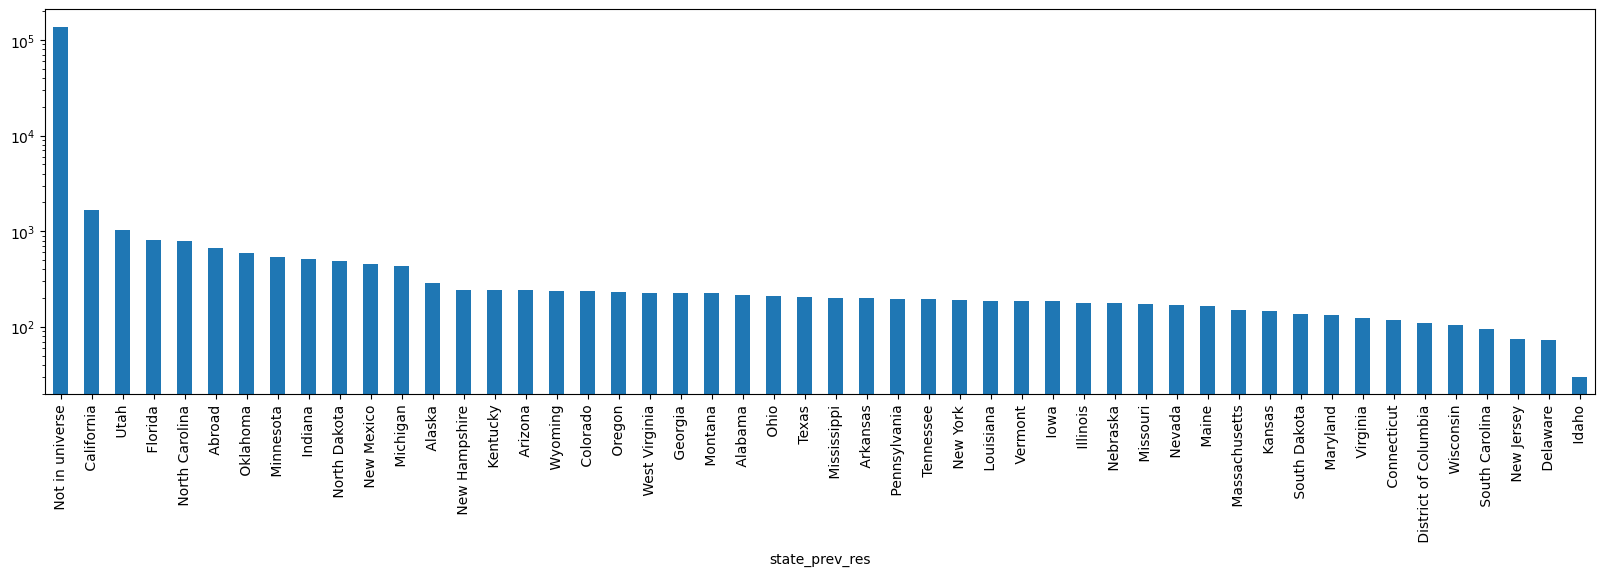

In [59]:
df1['state_prev_res'].value_counts().plot(kind='bar', logy=True, figsize=(20, 5))

since the columns state_prev_res, country_father, country_mother, and country_self have less than 5% of missing values, we can imputate them with the most frequent value.

In [60]:
# we fill the missing values with the most frequent value
cols_with_missing = df1.columns[df1.isnull().any()]
print(cols_with_missing)
for col in cols_with_missing:
    df1[col] = df1[col].fillna(df1[col].value_counts().index[0])  
print(f"Missing values: {sum(df1.isnull().sum())}")

Index(['state_prev_res', 'country_father', 'country_mother', 'country_self'], dtype='object')
Missing values: 0


### Converting numerical variables to categorical

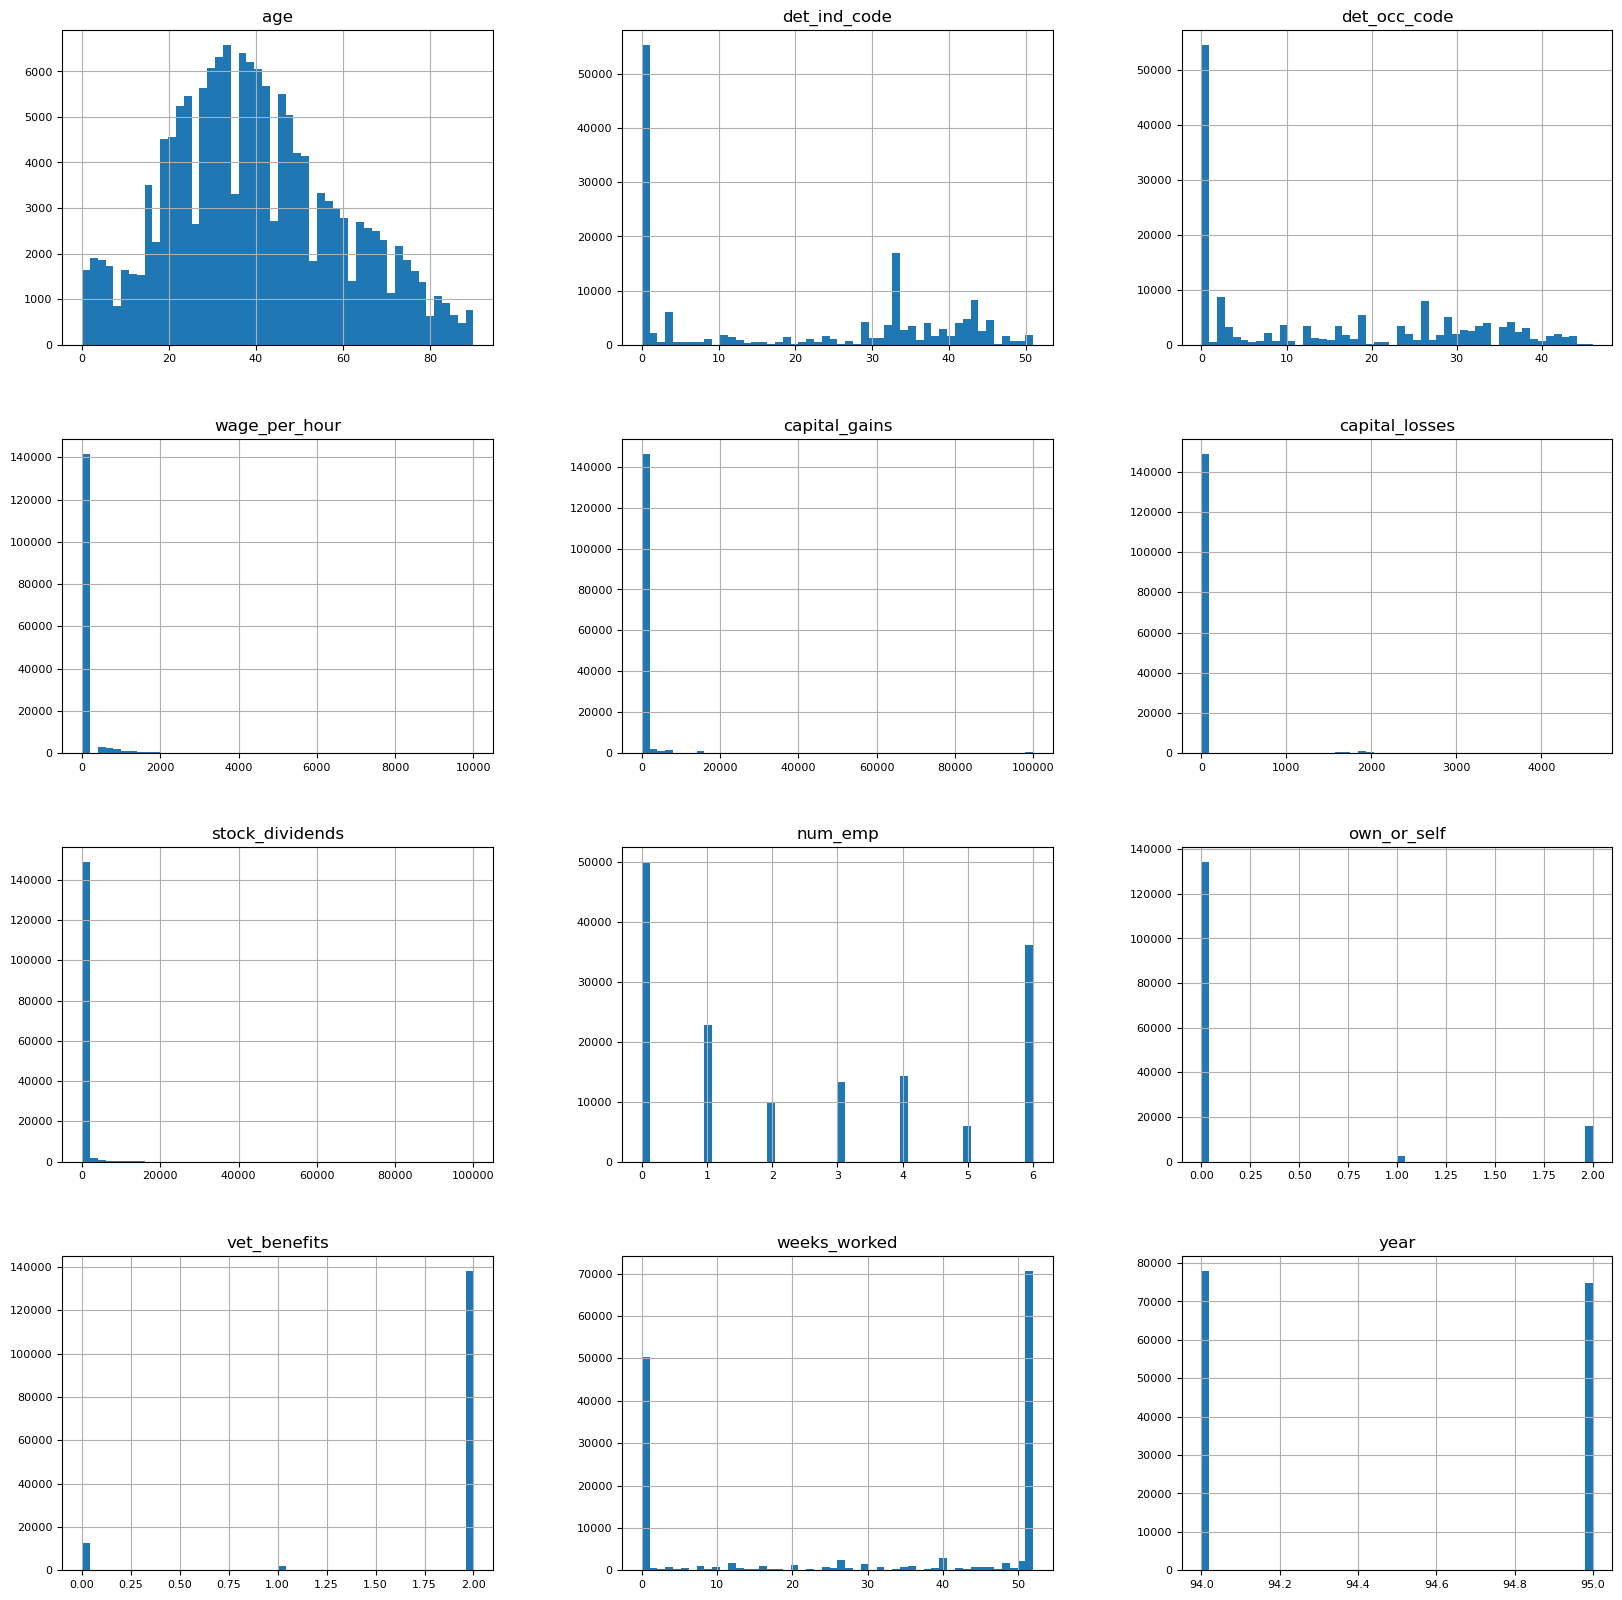

In [61]:
df1.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [62]:
# categorical columns hidden as numerical
for col in ['det_ind_code', 'det_occ_code', 'own_or_self', 'vet_benefits', 'year']:
    df1[col] = df1[col].astype('category')

In [63]:
age_bins = [-1, 18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
df1['age'] = pd.cut(df1['age'], bins=age_bins, labels=age_bins[:-1])

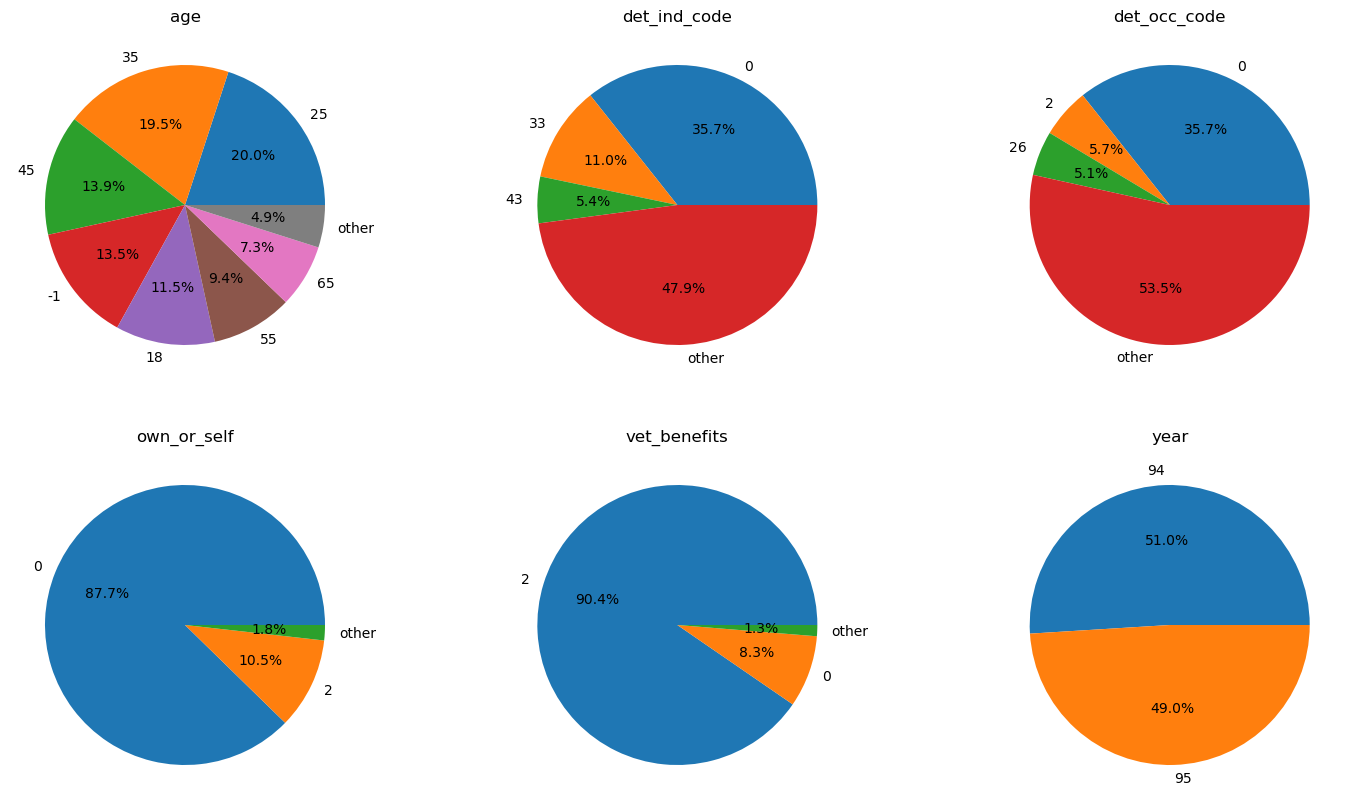

In [64]:
pieplots(df1, ['age', 'det_ind_code', 'det_occ_code', 'own_or_self', 'vet_benefits', 'year'],
         grid=(2,3), figsize=(18, 10), savename='figures/num_conv_pieplots.pdf')

For the decision trees and random forests, we don't need to have a balanced dataset, so we don't need to do any resampling.

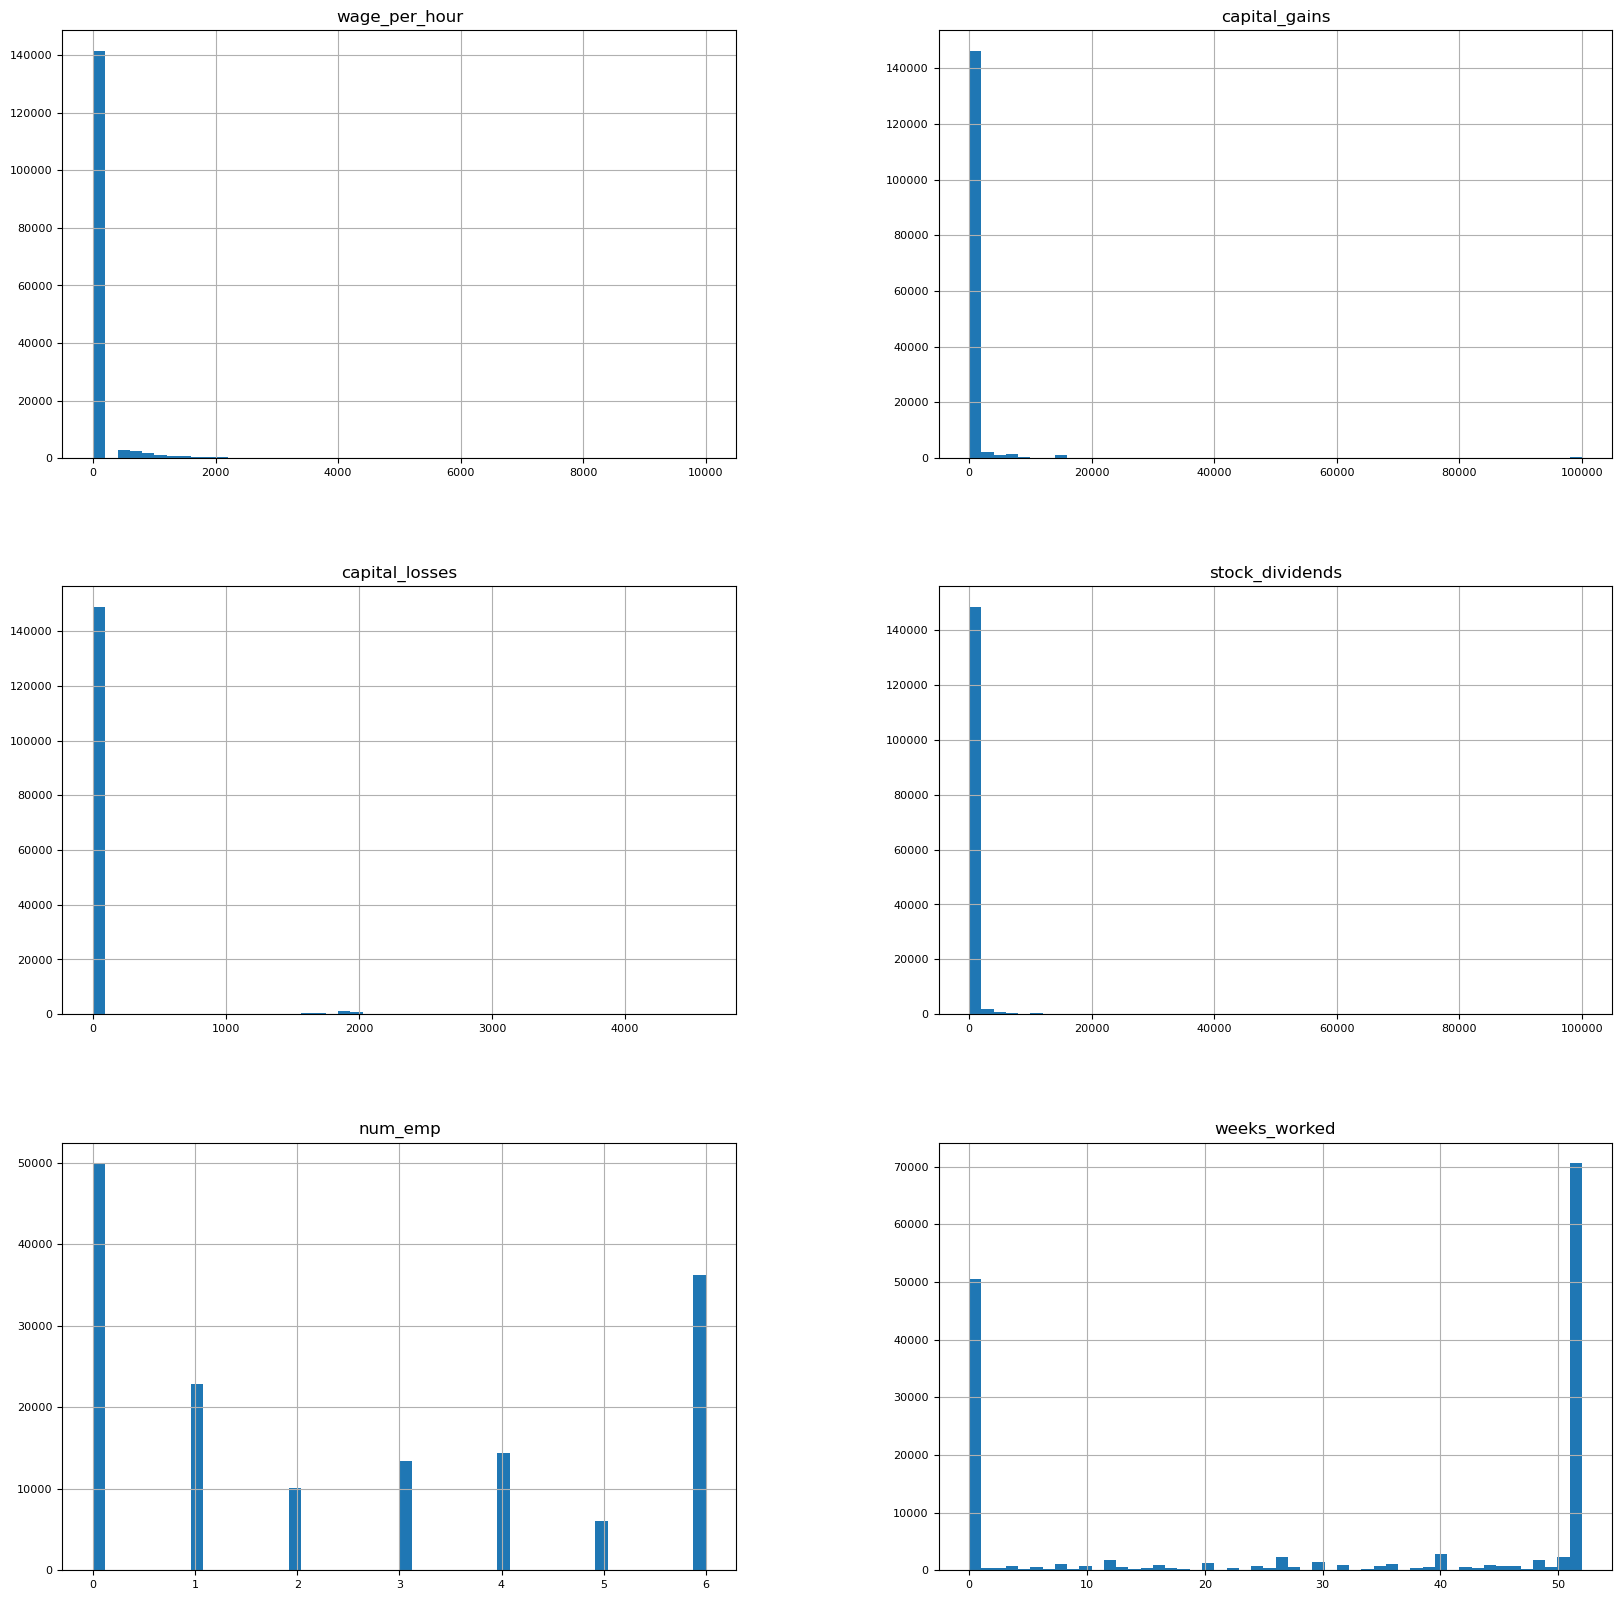

In [65]:
df1.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8, grid=(2,3))
plt.show()

We scale the remaining numerical variables.

array([[<AxesSubplot:title={'center':'wage_per_hour'}>,
        <AxesSubplot:title={'center':'capital_gains'}>],
       [<AxesSubplot:title={'center':'capital_losses'}>,
        <AxesSubplot:title={'center':'stock_dividends'}>],
       [<AxesSubplot:title={'center':'num_emp'}>,
        <AxesSubplot:title={'center':'weeks_worked'}>]], dtype=object)

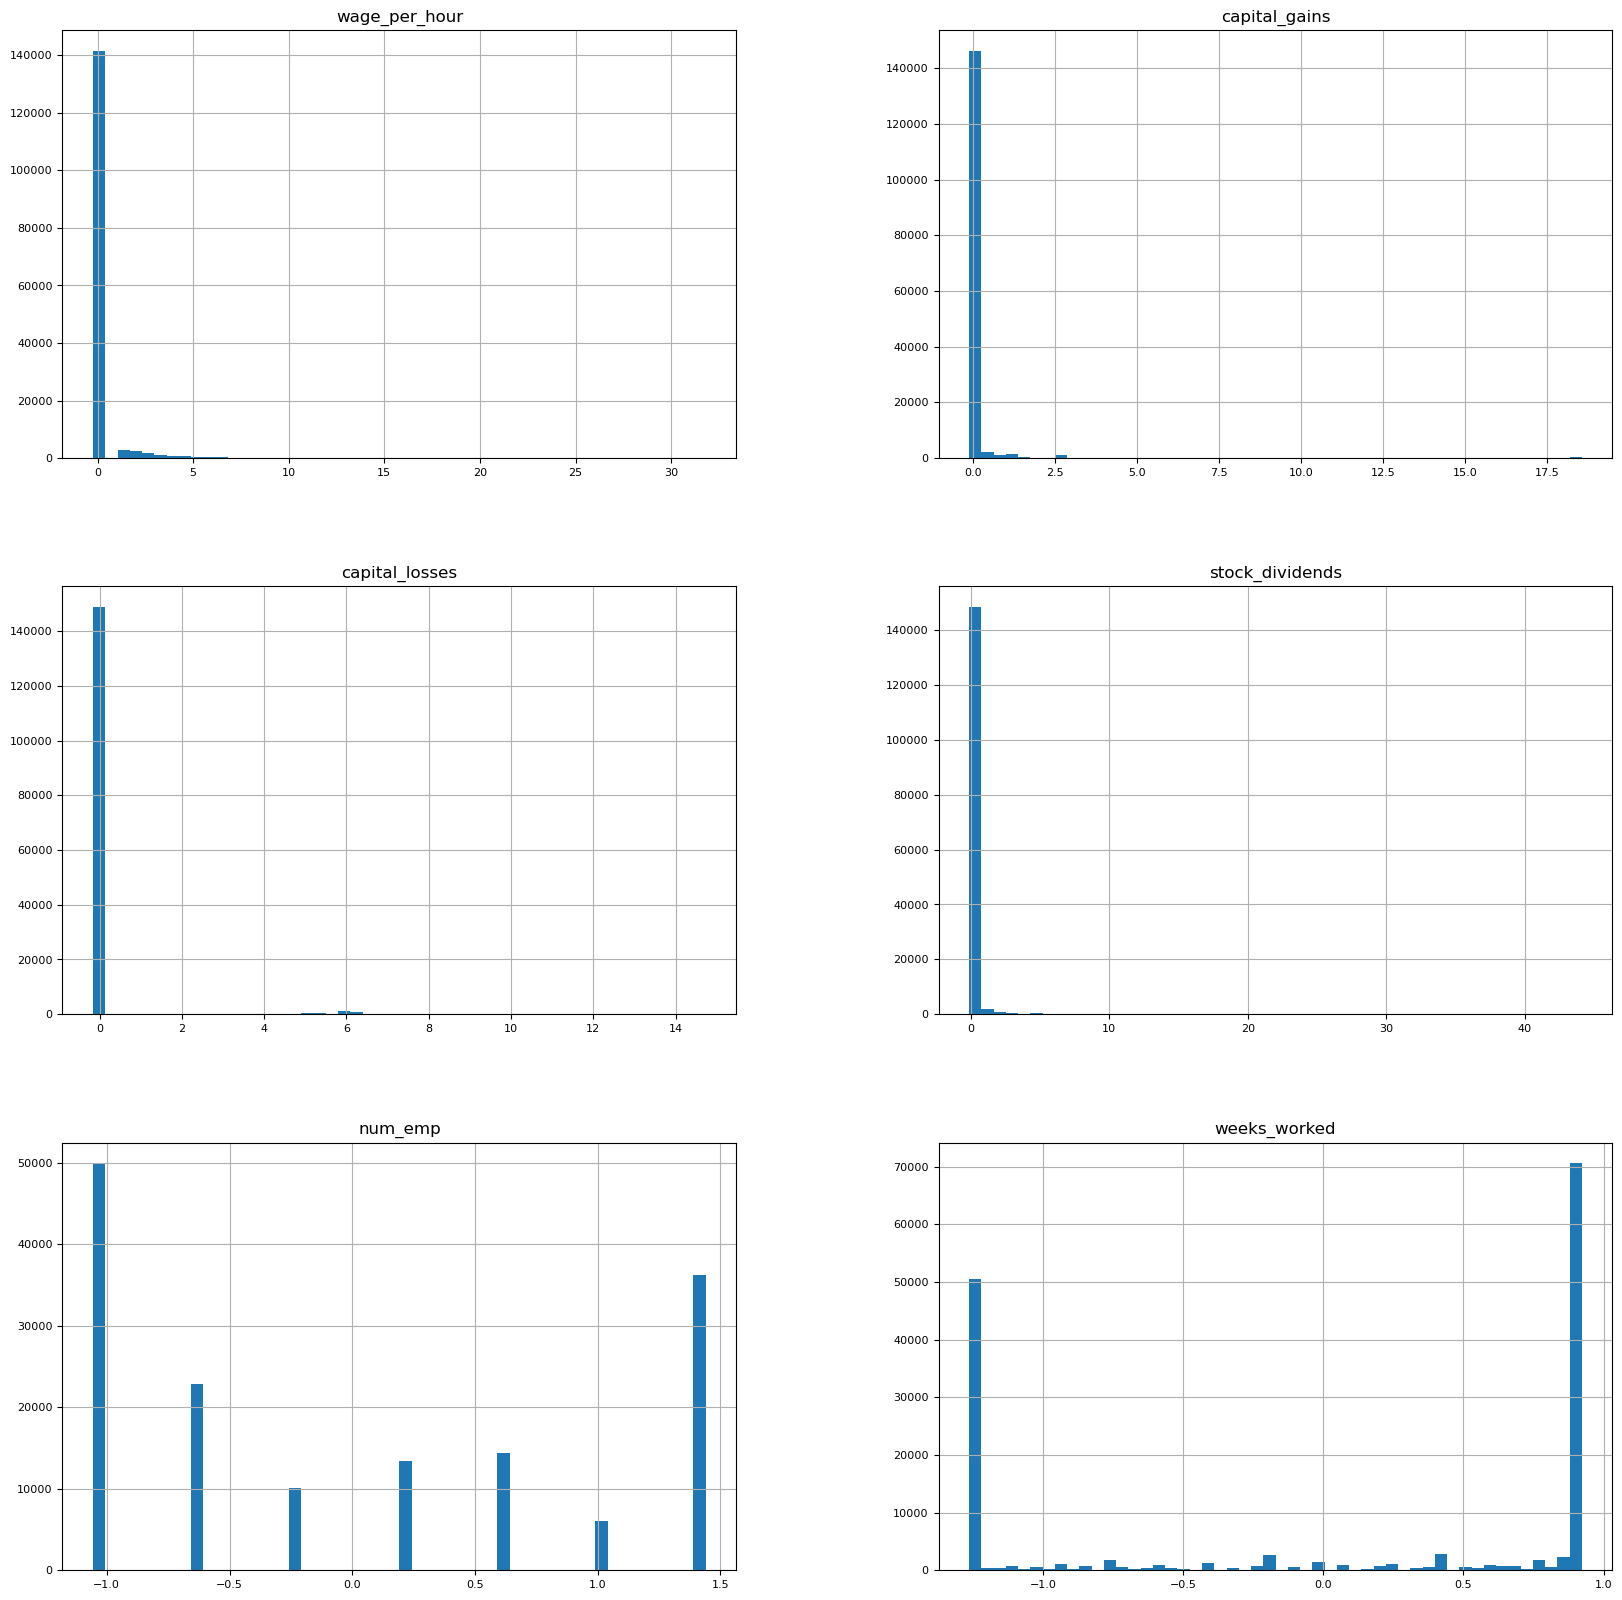

In [66]:
# scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = df1.select_dtypes(include=['int64', 'float64']).columns
df1[num_cols] = scaler.fit_transform(df1[num_cols])

df1.hist(figsize=(20,20), bins=50, xlabelsize=8, ylabelsize=8, grid=(2,3))

In [67]:
# convert all object columns type to category
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = df1[col].astype('category')

# Model adjustment

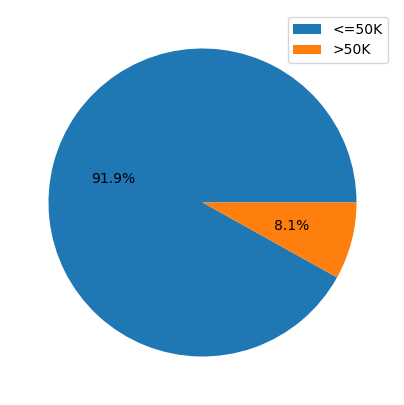

In [68]:
df1['income_50k'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5), labels=['', ''])
# keep the original labels
plt.legend(labels=['<=50K', '>50K'])
plt.ylabel('')
plt.savefig('figures/prep_target_freq.pdf')
plt.show()

## Random forest

Training data shape: (152896, 452)
Accuracy: 0.9383461597157121 n_estimators=22, max_depth=30 in 8.53 seconds


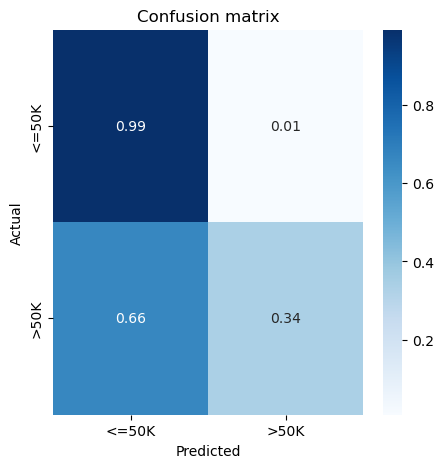

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df_rf = df1.copy()
df_rf['income_50k'] = np.where(df_rf['income_50k'] == ' - 50000.', 0, 1)

X = df_rf.drop('income_50k', axis=1)
y = df_rf['income_50k']

X = pd.get_dummies(X, drop_first=True)
print(f"Training data shape: {X.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# train models with different parameters
n_estimators = 22
max_depth = 30

t1 = time.time()
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)} n_estimators={n_estimators}, max_depth={max_depth} in {time.time() - t1:.2f} seconds")
plot_conf_matrix(y_test, y_pred, savename='figures/rf_conf_matrix.pdf')

#### Model results:

base model: 0.95417<br>
full categorical conversion: 0.933114<br>
semi categorical conversion: 0.938389<br>

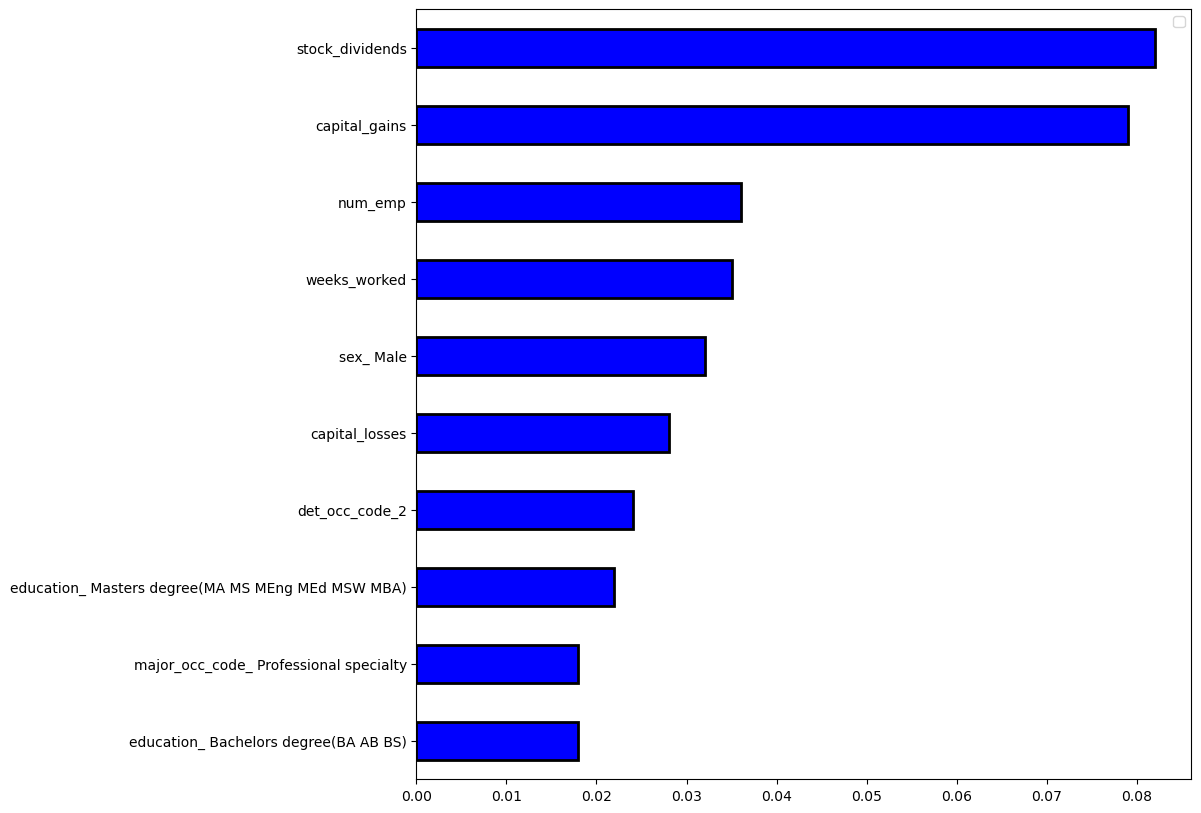

In [70]:
# plot of the feature importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances[:10].sort_values('importance', ascending=True).plot.barh(figsize=(10,10), color='blue', edgecolor='k', linewidth=2)

plt.xlabel('')
plt.ylabel('')
plt.legend('')

plt.savefig('figures/rf_feature_importance.pdf', bbox_inches='tight')
plt.show()